## В этом ноутбуке реализованы линейная регрессия, линейный классификатор и логистическая регрессия, а также решена двумя способами задача Яндекса на определение класса точек, сгенерированных разными генераторами. 
### Ноутбук составлен по мотивам лекций профессора Воронцова по ML для МФТИ и ШАД

In [1]:
import matplotlib.pyplot as plt
import random
from random import uniform
import math
from math import cos, sin, pi
import numpy as np
from time import sleep

### 1. Линейная регрессия

Построим модель линейной регрессии и обучим ее с помощью метода Stochastic Gradient Descent, реализовав его тут же

Независимая переменная

In [2]:
x_arr = [i for i in range(-20, 20)]

Зависимая переменная - правильные ответы. Будем ее аппроксимировать линейной регрессией

In [3]:
y_hat = [0.2*x - 14 for x in x_arr]

Text(0.5, 0, 'x_arr')

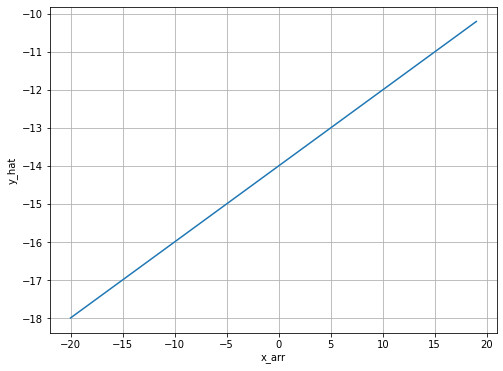

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(x_arr, y_hat)
plt.grid()
plt.ylabel('y_hat')
plt.xlabel('x_arr')

Задаем веса коэффициентов w[0], который при переменной, и w[1], который при bias

In [5]:
w = [uniform(-1, 1), uniform(-1, 1)]

In [6]:
h = 0.001 # - скорость обучения
lmbd = 0.05 # - скорость забывания для расчета скользящей экспоненциальной средней

In [7]:
def SGD(x_arr, y_hat, h, lmbd, w, debug = 0):
    q = 1e3 # - метрика функционала качества (эмпирический риск), экспоненциальную скользящую среднюю которого будем оценивать
    cntr = 1
    while abs(q) > 0.25:
        if debug:
            if cntr % 10 == 0: print(f"w[0] before = {w[0]}, w1 before = {w[1]}")
        i = random.randint(0, len(x_arr) - 1) # выбор экземпляра из массива независимых переменных для обучения - случаен
        # рассчитываем значение ошибки
        err = w[0] * x_arr[i] + w[1] - y_hat[i]
        q = lmbd * err + (1 - lmbd) * q 
        # делаем шаги по весам
        w[0] = w[0] - h * 2 * err * x_arr[i]
        w[1] = w[1] - h * 2 * err
        if debug:
            if cntr % 10 == 0: print(f"q = {q}, err = {err}, w[0] = {w[0]}, w1 = {w[1]}")
        cntr += 1
        if q > 1e4: break
    return w

In [8]:
SGD(x_arr, y_hat, h, lmbd, w, debug = 0)

[0.18503927338643597, -13.717628579223106]

Получили веса w, проверяем. q, к которой стремимся в SGD, специально выбрана большой (0.25), чтобы графики не сливались

Text(0.5, 0, 'x_arr')

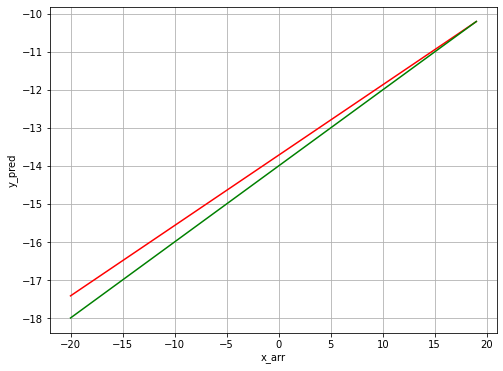

In [9]:
y_pred = [w[0]*x + w[1] for x in x_arr]
plt.figure(figsize=(8, 6))
plt.plot(x_arr, y_pred, 'r')
plt.plot(x_arr, y_hat, 'g')
plt.grid()
plt.ylabel('y_pred')
plt.xlabel('x_arr')

Попробуем теперь аппроксимировать не линейную функцию, а более сложный полином

Text(0.5, 0, 'x_arr')

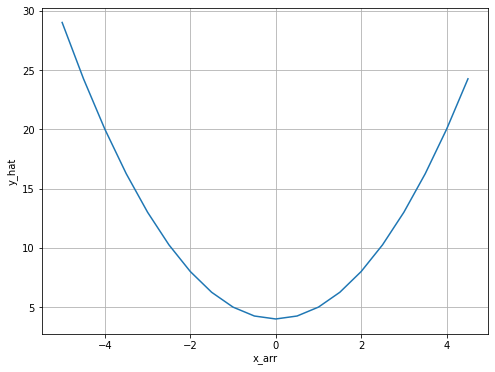

In [10]:
x_arr = [i for i in np.arange(-5, 5, 0.5)]
y_hat = [x*x + 4 for x in x_arr]
plt.figure(figsize=(8, 6))
plt.plot(x_arr, y_hat)
plt.grid()
plt.ylabel('y_hat')
plt.xlabel('x_arr')

Вносим небольшое отличие от стандартного алгоритма - будем применять разные LR для разных коэффициентов, иначе функционал качества быстро улетает в бесконечность, если h хотя бы 10-5, а если h меньше - то обучение очень медленное

Чтобы получить все графики на одних осях, необходимо закомментировать plt.pause. Если желательно видеть динамику - раскомментировать.
log_rate управляет тем, как много графиков рисовать. 

Нужно обратить внимание, что скорость забывания lambda, как в линейной регрессии - 0.05 - не подойдет. При более сложных типах полиномов и логистической ргерессии необходимо снижать дфьивф, чтобы короткая серия нулевых ошибок не остановила обучение слишком рано.

Алгоритм SGD_poly идентичен предыдущему, просто веса обновляются для 5 переменных, а не для двух

In [11]:
def SGD_poly(x_arr, y_hat, h, lmbd, w, log_rate = 200, debug = 0):
    q = 1000
    cntr = 1
    plt.figure(figsize=(8, 6))
    plt.grid()
    while abs(q) > 0.001:
        
        y_pred = [w[0]*math.pow(x,4) + w[1]*math.pow(x,3) + w[2]*math.pow(x,2)+ w[3]*x + w[4] for x in x_arr]

        # Отрисовка графиков
        if cntr % log_rate == 0:
            plt.axis([-5, 5, 0, 20])
            plt.plot(x_arr, y_hat, 'g')
            plt.plot(x_arr, y_pred, 'r')
            plt.ylabel('y_pred')
            plt.xlabel('x_arr')
            
#             plt.pause(0.001)
        
        if debug:
            if cntr % log_rate == 0: print(f"w[0] before = {w[0]}, w1 before = {w[1]}, w[2] before = {w[2]}, w3 before = {w[3]}, w4 before = {w[4]}")
        i = random.randint(0, len(x_arr) - 1)
        err = w[0] * math.pow(x_arr[i], 4) + w[1] * math.pow(x_arr[i], 3) + w[2] * math.pow(x_arr[i], 2) + w[3] * x_arr[i] + w[4] - y_hat[i]
        q = lmbd * err + (1 - lmbd) * q
        w[0] = w[0] - h[0] * 2 * err * math.pow(x_arr[i], 4)
        w[1] = w[1] - h[1] * 2 * err * math.pow(x_arr[i], 3)
        w[2] = w[2] - h[2] * 2 * err * math.pow(x_arr[i], 2)
        w[3] = w[3] - h[3] * 2 * err * x_arr[i]
        w[4] = w[4] - h[4] * 2 * err
        if debug:
            if cntr % log_rate == 0: print("err = {:.3f}, q = {:.3f}, w[0] = {:.3f}, w1 = {:.3f}, w[2] = {:.3f}, w3 = {:.3f}, w4 = {:.3f}\n"
                                     .format(err, q, w[0], w[1], w[2], w[3], w[4]))
            if cntr % log_rate == 0: print("dw1 = {:.6f}, dw[2] = {:.6f}, dw3 = {:.6f}, dw4 = {:.6f}\n"
                                     .format(h[0] * 2 * err * math.pow(x_arr[i], 4), h[1] * 2 * err * math.pow(x_arr[i], 3), 
                                             h[2] * 2 * err * math.pow(x_arr[i], 2), h[3] * 2 * err * x_arr[i], h[4] * 2 * err))
        cntr += 1
        if cntr > 5000: break
        if q > 1e5: break
    return w, q, cntr

([-0.00013458164709811255,
  -8.557224280155328e-05,
  1.0038636857584289,
  0.0002360029088964838,
  3.9826783084659225],
 6.687039278493578,
 5001)

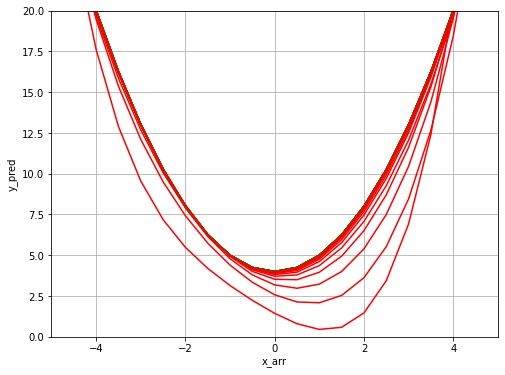

In [12]:
h = [0.000001, 0.00001, 0.0001, 0.001, 0.001]
lmbd = 0.001
w = [uniform(-1, 1), uniform(-1, 1), uniform(-1, 1), uniform(-1, 1), uniform(-1, 1)]
SGD_poly(x_arr, y_hat, h, lmbd, w, log_rate=300, debug = 0)

### 2. Линейный классификатор

Попробуем написать линейный классификатор, который будет возвращать значения классов. Зададим новую обучающую выборку, взяв за негативный класс -1:

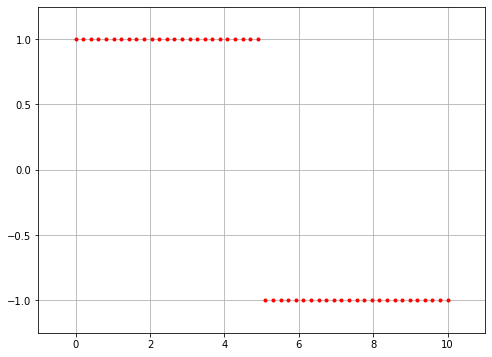

In [13]:
x_arr = np.linspace(0, 10, 50)
y_hat = [1 for i in range(25)] + [-1 for i in range(25)]
plt.figure(figsize=(8, 6))
plt.plot(x_arr, y_hat, 'r.')
plt.grid()
plt.axis([-1, 11, -1.25, 1.25])
plt.show()

MSE loss не подходит для задачи классификации по двум причинам. Если ответ будет близким к разделяющей поверхности, но неверным, модель почти не будет оштрафована за некорректную классификацию. Вторая причина в том, что верный класс может быть предсказан отличным от 1 значением, но все же лежащим в положительной полуплоскости - и такое предсказание будет считаться ошибочным. Возмьем в качестве функции потерь ошибку перцептрона, которая равна отступу, взятому с противоположным знаком в случае отрицательного отступа, и нулю в противном случае. 

In [14]:
def SGD(x_arr, y_hat, h, lmbd, w, log_rate = 100, debug = 0):
    q = 1e2
    cntr = 0
    while abs(q) > 0.5:
        if debug:
            if cntr % log_rate == 0: print(f"w[0] before = {w[0]}, w1 before = {w[1]}")
        i = random.randint(0, len(x_arr) - 1)
        
        # рассчитаем отступ и градиент функции ошибки
        margin = (w[0] * x_arr[i] + w[1]) * y_hat[i]
        grad = -y_hat[i] * x_arr[i]
        err = margin
        if margin >= 0:
            err = 0
            grad = 0
        q = lmbd * margin + (1 - lmbd) * q
        
        w[0] = w[0] - h * 2 * grad * x_arr[i]
        w[1] = w[1] - h * 2 * grad
        if debug:
            if cntr % log_rate == 0: print(f"iteration: {cntr}, q = {q}, margin = {margin}, err = {err}, w[0] = {w[0]}, w1 = {w[1]}")
        cntr += 1
        if q > 1e4: break
        if cntr > 100000: break
    return w

In [15]:
w = [uniform(-1, 1), 0]
h = 0.005
lmbd = 0.005
SGD(x_arr, y_hat, h, lmbd, w, log_rate = 10000, debug = 0)

[-0.20208273203334118, 0.9979591836734696]

In [16]:
y_pred = [w[0]*x + w[1] for x in x_arr]

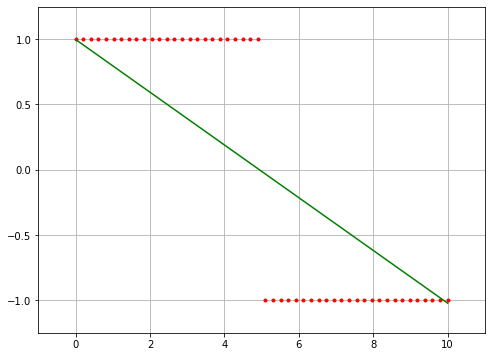

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(x_arr, y_hat, 'r.')
plt.plot(x_arr, y_pred, 'g')
plt.grid()
plt.axis([-1, 11, -1.25, 1.25])
plt.show()

In [18]:
def sign(x):
    return 1 if x >= 0 else -1

for x in np.linspace(0, 10, 21):
    print(x, sign(w[0]*x + w[1]))

0.0 1
0.5 1
1.0 1
1.5 1
2.0 1
2.5 1
3.0 1
3.5 1
4.0 1
4.5 1
5.0 -1
5.5 -1
6.0 -1
6.5 -1
7.0 -1
7.5 -1
8.0 -1
8.5 -1
9.0 -1
9.5 -1
10.0 -1


### 3. Логистическая регрессия

Будем снова обозначать отрицательный класс нулем.

In [19]:
x_arr = np.linspace(0, 10, 50)
y_hat = [1 for i in range(25)] + [0 for i in range(25)]

При реализации логистической регрессии нам потребуется сигма-функция:

In [20]:
def sig(x):
    return 1 / (1 + math.exp(-x))

Градиентный спуск ничем не отличается от линейной регрессии. В качестве функции ошибки возьмем nllloss:

In [21]:
def logloss(y_true, y_pred):
    eps = 1e-10
    return -y_true * math.log(y_pred + eps, 2) - (1 - y_true) * math.log(1 - y_pred + eps, 2)

In [22]:
def SGD_logistic(x_arr, y_hat, h, lmbd, w, log_rate = 1000, debug = 0):
    q = 1e2
    cntr = 0
    while abs(q) > 0.1:
        if debug:
            if cntr % log_rate == 0: print(f"w[0] before = {w[0]}, w1 before = {w[1]}")
        i = random.randint(0, len(x_arr) - 1)
        err = logloss(y_hat[i], sig(w[0] * x_arr[i] + w[1]))
        q = lmbd * err + (1 - lmbd) * q
        grad_w0 = x_arr[i] / math.log(2) * (sig(w[0] * x_arr[i] + w[1]) - y_hat[i])
        grad_w1 = 1 / math.log(2) * (sig(w[0] * x_arr[i] + w[1]) - y_hat[i])
        w[0] = w[0] - h * 2 * grad_w0
        w[1] = w[1] - h * 2 * grad_w1
        if debug:
            if cntr % log_rate == 0: print(f"iteration = {cntr}, q = {q}, err = {err}, w[0] = {w[0]}, w1 = {w[1]}")
        cntr += 1
        if q > 1e4: break
        if cntr > 100000: break
    return w

In [23]:
w = [uniform(-1, 1), 0]
h = 0.003
lmbd = 0.001
SGD_logistic(x_arr, y_hat, h, lmbd, w, debug = 0)

[-2.263291766034773, 11.155591794099985]

In [24]:
def logistic(x, w):
    return sig(w[0]*x + w[1])

In [25]:
y_pred = [logistic(x, w) for x in x_arr]

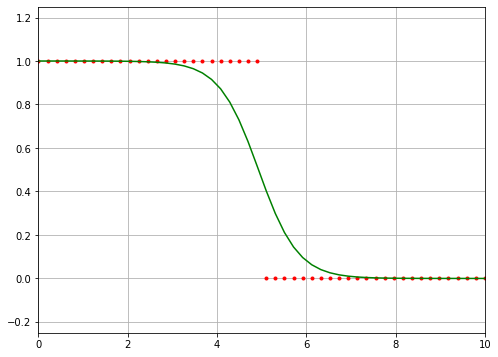

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(x_arr, y_hat, 'r.')
plt.plot(x_arr, y_pred, 'g')
plt.grid()
plt.axis([0, 10, -0.25, 1.25])
plt.show()

### 4. Задача Яндекса

Пробуем логистическую регрессию на задаче Яндекса

Петя написал два генератора точек в круге:

def generate1():  
    a = uniform(0, 1)  
    b = uniform(0, 1)  
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))


def generate2():  
    while True:  
        x = uniform(-1, 1)  
        y = uniform(-1, 1)  
        if x ** 2 + y ** 2 > 1:  
            continue  
        return (x, y)
        
        
Даны 100 наборов по 1000 точек, каждый набор сгенерирован каким-то одним из этих двух алгоритмов. Необходимо определить для каждого набора, первый или второй алгоритм использовался для его генерации.
Для того, чтобы получить ОК по этой задаче, надо предсказать правильный генератор хотя бы для 98 наборов.

In [27]:
def generate1():
    a = uniform(0, 1)
    b = uniform(0, 1)
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))

In [28]:
def generate2():  
    while True:  
        x = uniform(-1, 1)  
        y = uniform(-1, 1)  
        if x ** 2 + y ** 2 > 1:  
            continue  
        return (x, y)

In [29]:
x1_eta = []
y1_eta = []
for i in range(1000):
    x, y = generate1()
    x1_eta.append(x)
    y1_eta.append(y)

In [30]:
x2_eta = []
y2_eta = []
for i in range(1000):
    x, y = generate2()
    x2_eta.append(x)
    y2_eta.append(y)

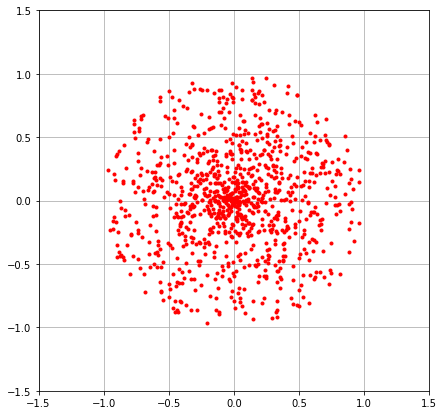

In [31]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x1_eta, y1_eta, 'r.')
ax.grid()
ax.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

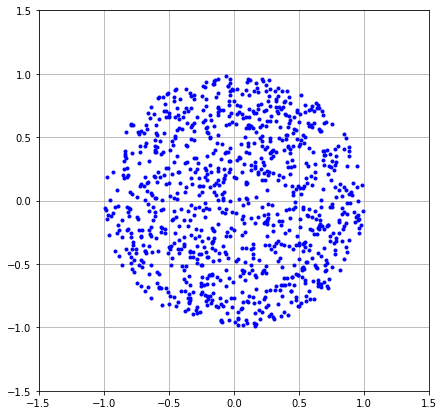

In [32]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x2_eta, y2_eta, 'b.')
# ax.plot(x1, y1, 'r.')
ax.grid()
ax.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

#### Оффтопик

Эту задачу легко можно решить критерием Колмогорова-Смирнова: Генерируем два пробных распределения и сравниваем их с эталонными. Там, где семейство одно, pvalue будет высоким, там, где семейства разные, будет стремиться к нулю. 

In [33]:
from scipy import stats
rng = np.random.default_rng()

In [34]:
x1 = []
y1 = []
for i in range(1000):
    x, y = generate1()
    x1.append(x)
    y1.append(y)

In [35]:
x2 = []
y2 = []
for i in range(1000):
    x, y = generate2()
    x2.append(x)
    y2.append(y)

In [36]:
print(stats.kstest(x1, x1_eta))
print(stats.kstest(x2, x1_eta))
print(stats.kstest(y1, y1_eta))
print(stats.kstest(y1, y2_eta))

KstestResult(statistic=0.031, pvalue=0.7228251828701066)
KstestResult(statistic=0.117, pvalue=2.214758736930358e-06)
KstestResult(statistic=0.025, pvalue=0.9136894237272155)
KstestResult(statistic=0.11, pvalue=1.0915917613597424e-05)


#### Теперь решаем логистической регрессией

Экземпляром в этой задаче является не точка, а набор точек. Причем точки в наборе качестве экземпляров рассматривать не получится, так как они двухмерные, а логистическая регрессия, как и почти все классификаторы, принимают только одномерные значения признаков (фич). Нужно преобразовать их в одномерные - самое простое - считать евклидово расстояние до центра координат

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
def eucl(x, y):
    return math.sqrt(x*x + y*y)

Генерируем обучающую выборку и учим классификтаор

In [39]:
def gen_train_set(generator, label, nsamples=100, nparams=100):
    train_set_x = []
    train_set_y = []
    for i in range(nsamples):
        sample = []
        for j in range(nparams):
            x, y = generator()
            sample.append(eucl(x, y))
        train_set_x.append(sample)
        train_set_y.append(label)
    return np.array(train_set_x), np.array(train_set_y)

In [40]:
train_x1, train_y1 = gen_train_set(generate1, 1, nsamples=500, nparams=100)
train_x2, train_y2 = gen_train_set(generate2, 2, nsamples=500, nparams=100)
train_x = np.concatenate((train_x1, train_x2), axis=0)
train_y = np.concatenate((train_y1, train_y2), axis=0)
clf = LogisticRegression().fit(train_x, train_y)

Генерируем тестовую выборку и проверяем классификатор

In [41]:
test_x1, test_y1 = gen_train_set(generate1, 1, nsamples = 1, nparams = 100)
test_x2, test_y2 = gen_train_set(generate2, 2, nsamples = 1, nparams = 100)

In [42]:
clf.predict_proba(test_x1)

array([[0.99051432, 0.00948568]])

In [43]:
clf.predict_proba(test_x2)

array([[9.17282582e-04, 9.99082717e-01]])

In [44]:
clf.predict(test_x1), clf.predict(test_x2)

(array([1]), array([2]))